In [37]:
import pandas as pd
import seaborn as sb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import csv file to memory

In [4]:
data=pd.read_csv('uber-raw-data-apr14 .csv')

In [5]:
data.shape

(564516, 4)

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


# change date time column to timestamp

In [10]:
date = data['Date/Time'].map(pd.to_datetime)
data['Date/Time']= date

In [22]:
def dom(date):
    return date.day
data['Date']=data['Date/Time'].map(dom)

def month(date):
    return date.month
data['Month']=data['Date/Time'].map(month)


def week(date):
    return date.weekday()
data['Day']=data['Date/Time'].map(week)

def hour(date):
    return date.hour
data['Hour']=data['Date/Time'].map(hour)




data.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Month,Date
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0,4,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0,4,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0,4,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0,4,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0,4,1


# Analysis

For Date

Text(0.5, 1.0, 'Frequency by Month')

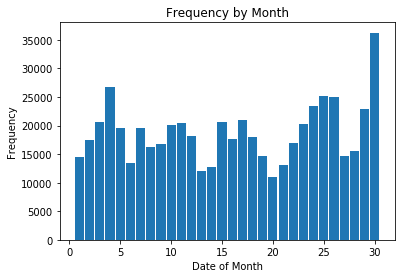

In [38]:
hist(data.Date, bins=30,rwidth=.9,range=(0.5,30.5))
xlabel("Date of Month")
ylabel('Frequency')
title('Frequency by Month')

In [45]:
def rows(row):
    return len(row)
by_date=data.groupby("Date").apply(rows)
by_date


Date
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

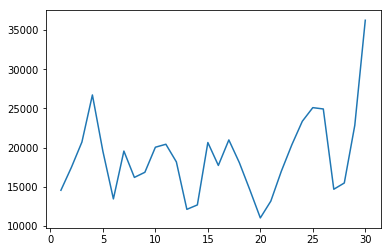

In [46]:
plot(by_date)

In [48]:
sort=by_date.sort_values()
sort

Date
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

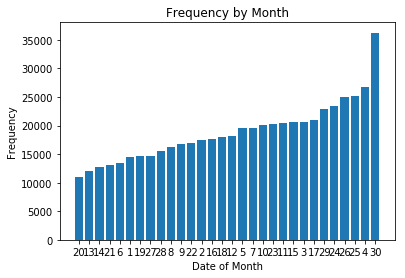

In [63]:
bar(range(1,31), sort,)
xticks(range(1,31), sort.index)
xlabel("Date of Month")
ylabel('Frequency')
title('Frequency by Month');

For Hour

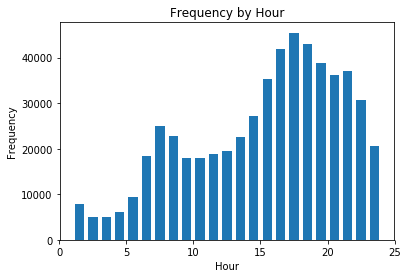

In [79]:
hist(data.Hour,range(1,25),rwidth=0.7)
xlabel("Hour")
ylabel('Frequency')
title('Frequency by Hour');

For Weekday

([<matplotlib.axis.XTick at 0x22d2c6a2860>,
 <a list of 7 Text xticklabel objects>)

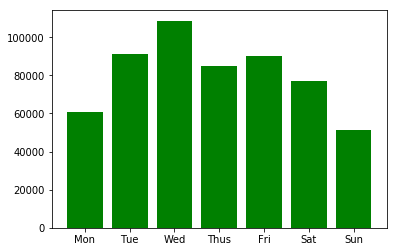

In [88]:
hist(data.Day, bins=7,range=(-0.5,6.5),rwidth=.8,color='green')
xticks(range(7),"Mon Tue Wed Thus Fri Sat Sun".split())

# Cross Analysis


Hour and Day

In [93]:
group= data.groupby('Day Hour'.split()).apply(rows).unstack()
group

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


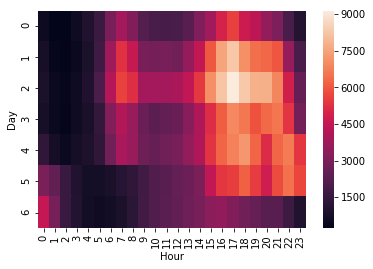

In [95]:
sb.heatmap(group)

Lattitude and Longitude


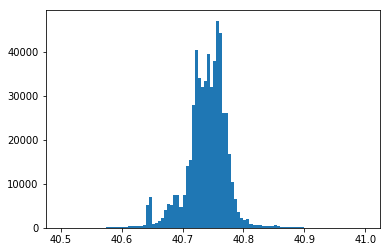

In [106]:
hist(data['Lat'],bins=100,range=(40.5,41));

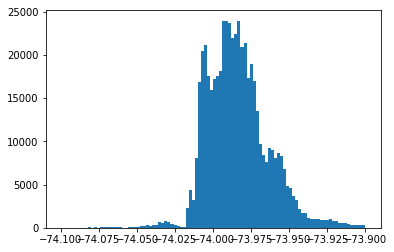

In [109]:
hist(data['Lon'],bins=100,range=(-74.1,-73.9));

''

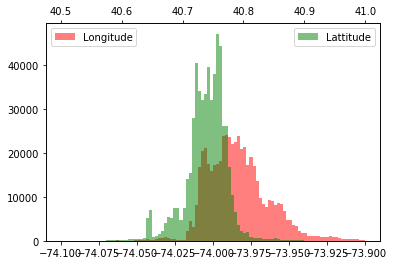

In [123]:
hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='r',alpha=.5,label='Longitude')
legend(loc='upper left')
twiny()
hist(data['Lat'],bins=100,range=(40.5,41),color='g',alpha=.5,label='Lattitude')
legend(loc='best')
;

(50, 100)

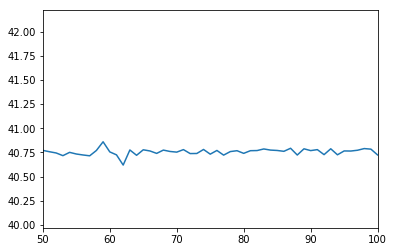

In [145]:
plot(data['Lat'],'-',ms=10)
plt.xlim((50, 100)) 